In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
df = pd.read_csv('Churn_Modelling.csv')

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
##Divide the dataset into dependent and independent features
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [31]:
##Feature Engineering
geo = pd.get_dummies(X['Geography'],drop_first=True,dtype=int)
gender = pd.get_dummies(X['Gender'],drop_first=True,dtype=int)

In [32]:
##concatenate geo and gender
X = X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [34]:
X = pd.concat([X,geo,gender],axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (8000, 11)
Shape of y_train: (8000,)
Shape of X_test: (2000, 11)
Shape of y_test: (2000,)


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [69]:
#Initializing the model
classifier = Sequential()
#Add input layer
classifier.add(Dense(units=11,activation='relu'))
#Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#Adding Dropout layer
classifier.add(Dropout(0.2))
#Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

## Explanation of the model


1.   We initial the model and add the input layer.
2.   Next, we go to add the hidden layers. Generally, for hidden layer, the activation function used is "relu".
3.  Finally, we add our output layer, which has just 1 units since it is a binary classifier and the activation function used for the output layer of binary classification is "sigmoid".



In [70]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [73]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4633 - accuracy: 0.7906 - val_loss: 0.4070 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3993 - accuracy: 0.8293 - val_loss: 0.3856 - val_accuracy: 0.8398
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3785 - accuracy: 0.8468 - val_loss: 0.3729 - val_accuracy: 0.8440
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3709 - accuracy: 0.8455 - val_loss: 0.3845 - val_accuracy: 0.8402
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3679 - accuracy: 0.8520 - val_loss: 0.3684 - val_accuracy: 0.8493
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3639 - accuracy: 0.8550 - val_loss: 0.3640 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3605 - accuracy: 0.8520 - val_loss: 0.3781 - val_accuracy:

When the accuracy is not increasing after some epochs, we use "Early Stopping".

In [74]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1512   83]
 [ 191  214]]


In [76]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy of the model on test dataset is',score)

The accuracy of the model on test dataset is 0.863


In [81]:
#To view the weights at each step
wieghts = classifier.get_weights()

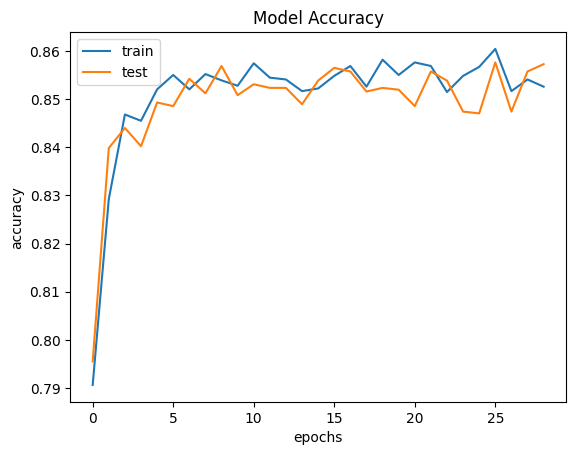

In [80]:
plt.plot(model_history.history['accuracy'],label = 'train')
plt.plot(model_history.history['val_accuracy'],label='test')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

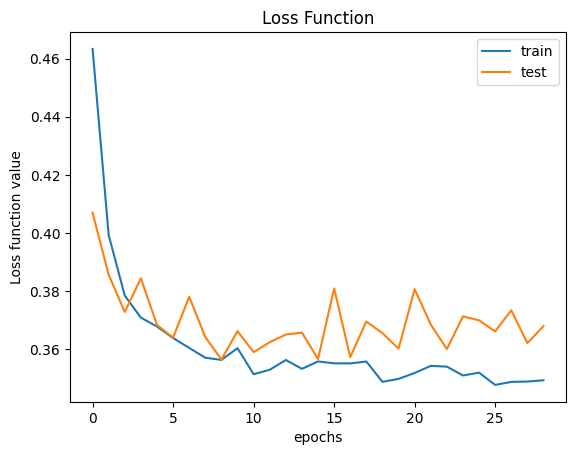

In [82]:
plt.plot(model_history.history['loss'],label = 'train')
plt.plot(model_history.history['val_loss'],label='test')
plt.title('Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss function value')
plt.legend()
plt.show()